# Forecast Martian Dust Storm Movements

The goal of this analysis is attempt to forecast martian storm movements and impacts, including after being combined with other storms.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('MDAD.csv')
data.head()

,Mars Year,Mission subphase,Sol,Ls,Centroid longitude,Centroid latitude,Area (square km),Member ID,Sequence ID,Maximum latitude,Minimum latitude,Confidence interval,Missing data
0,29,B01,1,120.9,28.85,76.95000,90356.984,B01_001,NaN,83.25,71.35,75,no
1,29,B01,2,121.4,29.65,74.25000,156925.090,B01_001,NaN,81.95,66.85,50,no
2,29,B01,2,121.4,-117.05,-7.64999,35037.652,B01_004,NaN,-5.45,-9.95,100,no
3,29,B01,3,121.8,36.05,71.75000,209257.090,B01_001,NaN,77.45,64.75,50,no
4,29,B01,3,121.8,-146.55,77.65000,186898.530,B01_006,NaN,84.25,70.05,50,no


## Data Exploration

In [6]:
data['Mars Year'].unique()

array([29, 30, 31, 32, 28, 25, 26, 24, 27], dtype=int64)

In [7]:
data['Mission subphase'].unique()

array(['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09',
       'B10', 'B11', 'B12', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21',
       'B22', 'D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08',
       'D09', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17',
       'D18', 'D19', 'D20', 'D21', 'D22', 'F01', 'F02', 'F03', 'F04',
       'G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09',
       'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18',
       'G19', 'G20', 'G21', 'G22', 'G23', 'P01', 'P02', 'P03', 'P04',
       'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P11', 'P12', 'P13',
       'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22',
       'e01', 'e02', 'e03', 'e04', 'e05', 'e06', 'e07', 'e08', 'e09',
       'e10', 'e11', 'e12', 'e13', 'e14', 'e15', 'e16', 'e17', 'e18',
       'e19', 'e20', 'e21', 'e22', 'e23', 'm02', 'm03', 'm04', 'm07',
       'm08', 'm09', 'm10', 'm11', 'm12', 'm13', 'm14', 'm15', 'm16',
       'm17', 'm18',

In [8]:
data['Sol'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 18, 19, 20,
       24, 28, 29, 31, 32, 13, 16, 17, 21, 22, 23, 25, 26, 27, 30, 33, 34,
       35, 36, 37], dtype=int64)

In [11]:
# number of unique storms
len(data['Member ID'].unique())

8294

<AxesSubplot:>

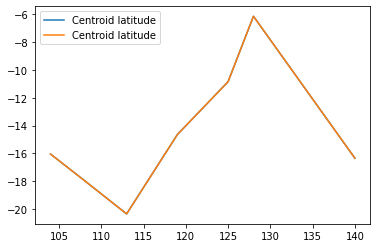

In [13]:
#sample storm plotting
sample_storm = data[data['Member ID'] == 'B02_011+013+032']
sample_storm = sample_storm[['Centroid latitude','Centroid latitude']]
sample_storm.plot()

In [39]:
# plot lines for each storm in database

# by storm
# sort year and sol min to max
unique_storm_count = len(data['Member ID'].unique())
plt.figure(figsize=[30,15])
for count,storm_id in enumerate(data['Member ID'].unique()):
    #print(count)
    if count % 1000 == 0:
        print(f"{count}/{unique_storm_count}")
    individual_storm = data[data['Member ID'] == storm_id]
    individual_storm = individual_storm.sort_values(['Mars Year','Sol'], ascending=True)
    plt.plot(individual_storm[['Centroid longitude', 'Centroid latitude']])


KeyboardInterrupt: 

In [33]:
storm_id

's23_011'

array([[<AxesSubplot:title={'center':'Centroid longitude'}>,
        <AxesSubplot:title={'center':'Centroid latitude'}>]], dtype=object)

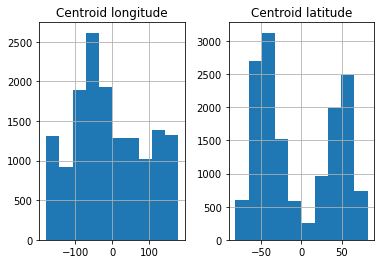

In [38]:
data[['Centroid longitude', 'Centroid latitude']].hist()

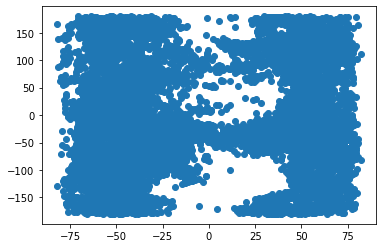

In [42]:
plt.scatter(x=data['Centroid latitude'], y=data['Centroid longitude'])